In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import seaborn as sns
import pandas as pd

In [2]:
train_data=os.listdir("/content/drive/MyDrive/space_junks/train/images")
validate_data=os.listdir("/content/drive/MyDrive/space_junks/valid/images")
test_data=os.listdir("/content/drive/MyDrive/space_junks/test/images")

In [3]:
print(f"lenght of train data is {len(train_data)}")
print(f"lenght of validate data is {len(validate_data)}")
print(f"lenght of test data is {len(test_data)}")

lenght of train data is 348
lenght of validate data is 45
lenght of test data is 27


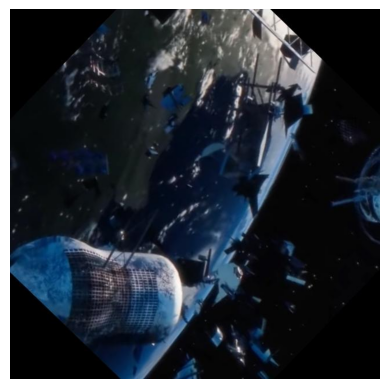

In [4]:
base_dir = "/content/drive/MyDrive/space_junks/train/images"
filename = train_data[5]
file_path = os.path.join(base_dir, filename)
img = cv2.imread(file_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

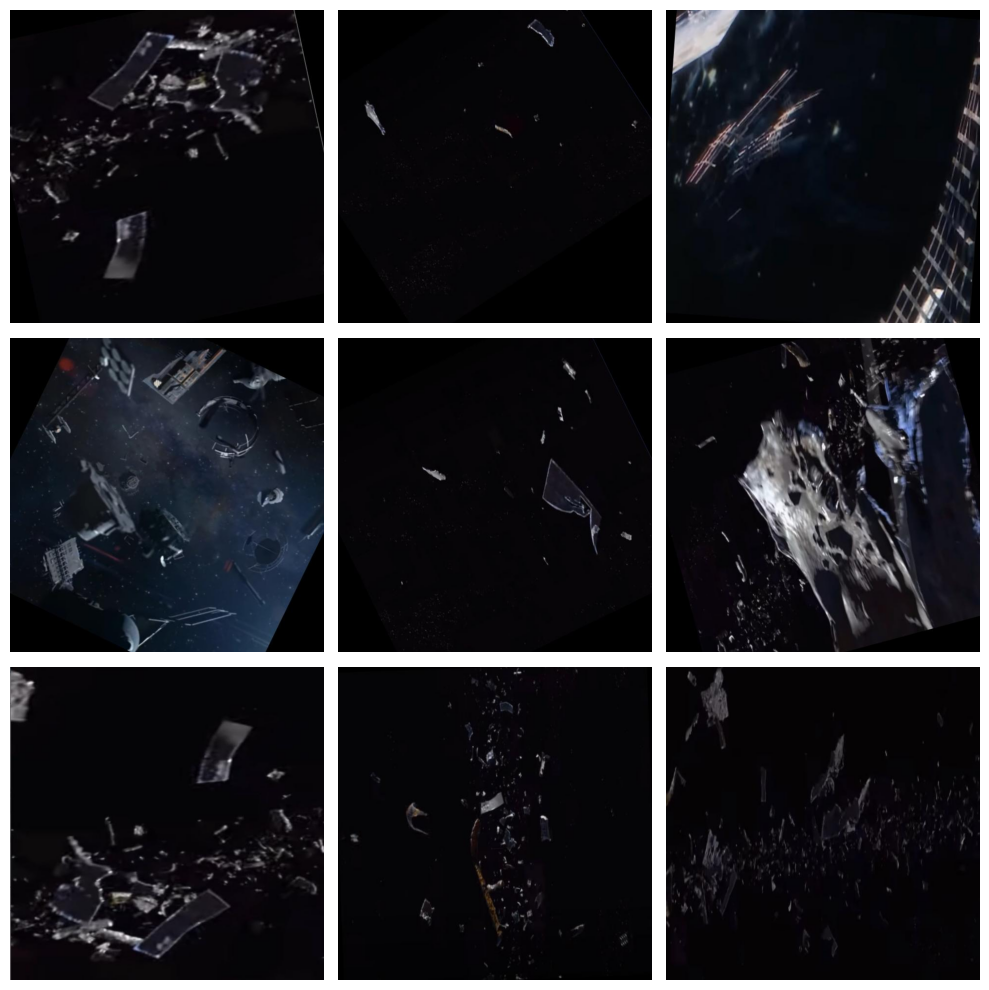

In [ ]:
plt.figure(figsize=(10, 10))
random_indices = random.sample(range(len(train_data)), 9)

for i in random_indices:
  plt.subplot(3,3, random_indices.index(i)+1)
  file_path = os.path.join(base_dir, train_data[i])
  img=cv2.imread(file_path)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
folder_path = "//content/drive/MyDrive/space_junks/train/images"
for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, (640, 640), interpolation=cv2.INTER_AREA)
            cv2.imwrite(img_path, resized_img, [cv2.IMWRITE_JPEG_QUALITY, 95])

In [ ]:
img_rgb.shape

(640, 640, 3)

In [5]:
!pip install ultralytics
import ultralytics
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
model = YOLO("yolo9c.pt")
results = model.train(
    data="/content/drive/MyDrive/space_junks/data.yaml",
    epochs=100,              # number of training epochs
    imgsz=640,
    patience=50,            # number of epochs patient to early stopping
    optimizer='SGD',        # use optimizer SGD
    lr0=0.001,              # initial learning rate
    lrf=0.01,               # final learning rate
    dropout=0.3,            # dropout to prevent overfitting
    batch=32,
    seed=0,                 # Random seed for reproducibility
    warmup_epochs=5,        # warmup epochs to prevent early training instability
    weight_decay=0.001,     # L2 regularization factor to prevent overfitting
    box=0.1,                #  box loss weight
    cls=0.3,                #  classification loss weight for class balance
    project="/content/drive/MyDrive/debris/runs",
    name="train_v1",
    exist_ok=True,
    amp=True
)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/debris/runs/train_yolo9_v1/results.csv")

In [ ]:
df.head(5)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,406.265,0.02910,1.80529,1.98538,0.13561,0.07225,0.04261,0.01767,0.02864,1.72596,1.96623,0.090100,0.000100,0.000100
1,2,805.050,0.02913,1.51839,1.98066,0.26865,0.27746,0.16331,0.05909,0.02869,1.34040,1.94337,0.079208,0.000208,0.000208
2,3,1204.020,0.02757,1.25077,1.90697,0.40540,0.26734,0.23406,0.09938,0.02717,1.18804,1.78482,0.068314,0.000314,0.000314
3,4,1604.620,0.02661,1.09380,1.79099,0.41704,0.31358,0.27482,0.12317,0.02661,1.09607,1.71090,0.057417,0.000417,0.000417
4,5,2008.020,0.02566,0.96250,1.71442,0.46082,0.35694,0.31357,0.13685,0.02668,1.00776,1.68301,0.046519,0.000519,0.000519


In [ ]:
def plot_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='blue',  linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orange',  linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

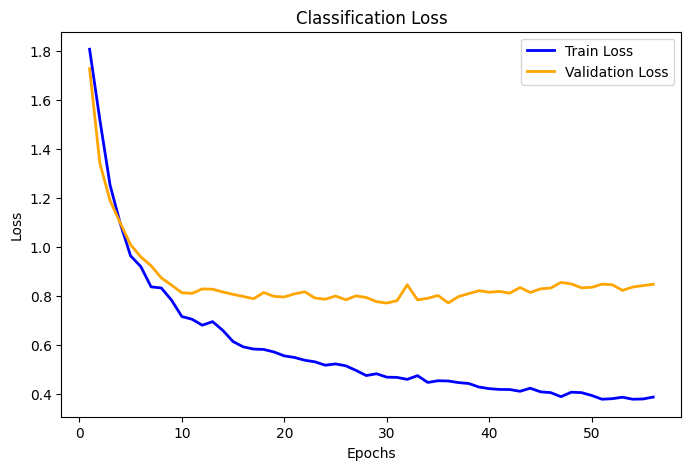

In [ ]:
plot_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss')

In [7]:
model=YOLO('/content/drive/MyDrive/debris/runs/train_yolo9_v1/weights/best.pt')

In [ ]:
metrics = model.val(data='/content/drive/MyDrive/debris/data.yaml')
print(metrics.box.map)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


100%|██████████| 755k/755k [00:00<00:00, 122MB/s]


val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.0±0.0 MB/s, size: 34.1 KB)


val: Scanning /content/drive/MyDrive/debris/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 124, len(boxes) = 692. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.74s/it]


                   all         45        692      0.584      0.464      0.448      0.222
Speed: 3.0ms preprocess, 35.2ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/val2
0.22210385760979054



0: 640x640 42 junks, 48.9ms
Speed: 4.6ms preprocess, 48.9ms inference, 348.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 24 junks, 48.9ms
Speed: 2.5ms preprocess, 48.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 28 junks, 48.9ms
Speed: 2.6ms preprocess, 48.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 junks, 48.8ms
Speed: 2.0ms preprocess, 48.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 junks, 48.9ms
Speed: 2.0ms preprocess, 48.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 junks, 48.9ms
Speed: 2.0ms preprocess, 48.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 36 junks, 48.8ms
Speed: 2.5ms preprocess, 48.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 junks, 48.9ms
Speed: 2.6ms preprocess, 48.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640

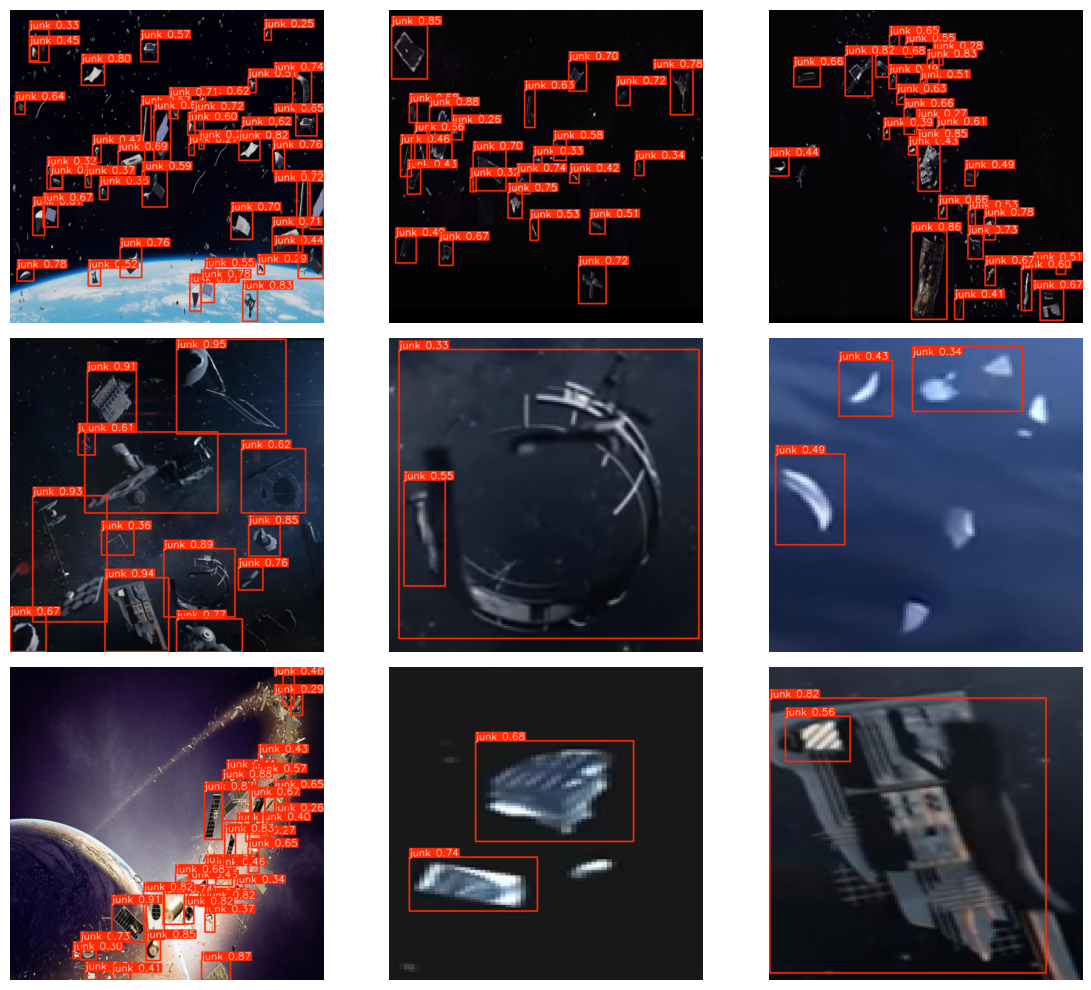

In [8]:
val_images = '/content/drive/MyDrive/space_junks/valid/images'
val_images_list = [f for f in os.listdir(val_images) ]
random_images = random.sample(val_images_list, 9)

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.ravel()

for i, img_name in enumerate(random_images):
    img_path = os.path.join(val_images, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img)
    pred_img = results[0].plot()
    axes[i].imshow(pred_img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


0: 640x640 1 junk, 48.9ms
Speed: 1.9ms preprocess, 48.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 junks, 48.9ms
Speed: 2.2ms preprocess, 48.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 junks, 48.9ms
Speed: 2.0ms preprocess, 48.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 junk, 48.9ms
Speed: 2.4ms preprocess, 48.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 17 junks, 48.9ms
Speed: 2.4ms preprocess, 48.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 junks, 48.8ms
Speed: 2.2ms preprocess, 48.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 junks, 48.9ms
Speed: 2.2ms preprocess, 48.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 junks, 48.9ms
Speed: 2.3ms preprocess, 48.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640

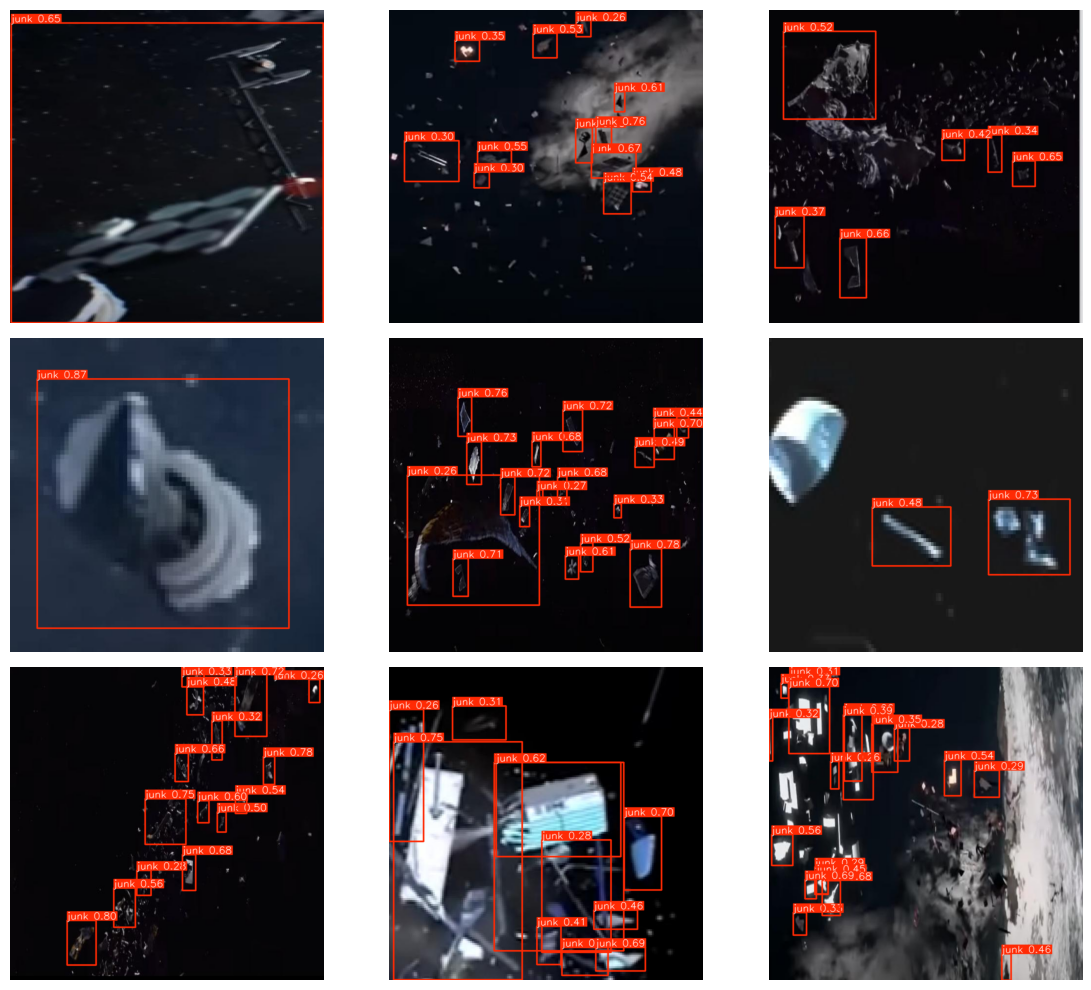

In [9]:
test_images = '/content/drive/MyDrive/space_junks/test/images'
test_images_list = [f for f in os.listdir(test_images) ]
random_images = random.sample(test_images_list, 9)

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.ravel()

for i, img_name in enumerate(random_images):
    img_path = os.path.join(test_images, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img)
    pred_img = results[0].plot()
    axes[i].imshow(pred_img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
image = cv2.imread('/content/drive/MyDrive/space_junks/test/images/-31_png.rf.dee49920cfd864eada1359d154947005.jpg')

# Run detection
results = model(image)


0: 640x640 13 junks, 48.9ms
Speed: 2.1ms preprocess, 48.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [18]:
image = cv2.imread('/content/drive/MyDrive/test_model/test1.png')
img_height, img_width = image.shape[:2]
results = model(image)


0: 448x640 1 junk, 56.6ms
Speed: 7.6ms preprocess, 56.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


In [19]:
object_info = []

img_height, img_width = image.shape[:2]
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        width = x2 - x1
        height = y2 - y1

        # Calculate center point of object
        center_x = (x1 + x2) / 2
        center_y = (y1 + y2) / 2

        # Determine horizontal direction
        if center_x < img_width / 3:
            horizontal_dir = "left"
        elif center_x > 2 * img_width / 3:
            horizontal_dir = "right"
        else:
            horizontal_dir = "center"

        # Determine vertical direction
        if center_y < img_height / 3:
            vertical_dir = "top"
        elif center_y > 2 * img_height / 3:
            vertical_dir = "bottom"
        else:
            vertical_dir = "middle"

        if horizontal_dir == "center" and vertical_dir == "middle":
            position = "center"
        else:
            position = f"{vertical_dir}-{horizontal_dir}"

        # Store object details
        object_info.append({
            'class_id': int(box.cls),
            'class_name': model.names[int(box.cls)],
            'width': width,
            'height': height,
            'center_x': center_x,
            'center_y': center_y,
            'position': position
        })
        print(f"\nObject {model.names[int(box.cls)]} (ID: {int(box.cls)}):")
        print(f" Width: {width:.2f}px, Height: {height:.2f}px")
        print(f" Position: {position}")
        print(f" Center at: ({center_x:.1f}, {center_y:.1f})")


Object junk (ID: 0):
 Width: 72.32px, Height: 152.89px
 Position: center
 Center at: (134.7, 87.9)


In [20]:
def decide_satellite_movement(objects):
    if not objects:
        return "No objects detected, stay in position"

    # Simple decision: Move opposite to the closest object's horizontal position
    # Prioritize objects in the "left" or "right" to avoid collision
    for obj in objects:
        if "left" in obj['position']:
            return "Move satellite right"
        elif "right" in obj['position']:
            return "Move satellite left"

    # If no objects are on left or right, check if any are in center
    for obj in objects:
        if obj['position'] == "center":
            # Could refine further based on vertical position or size
            return "Move satellite slightly right"  # Arbitrary choice, can adjust logic

    # Default: No critical objects in horizontal extremes or center
    return "Stay in position"

In [13]:
decision = decide_satellite_movement(object_info)
print(f"\nSatellite Decision: {decision}")


Satellite Decision: Move satellite right
